# **Theoretical**

# 1. What is a Support Vector Machine (SVM).
### **Ans:-** A **Support Vector Machine (SVM)** is a supervised machine learning algorithm primarily used for **classification** and **regression** tasks. It works by finding the optimal **hyperplane** that best separates data points of different classes in a high-dimensional space.

### **Key Concepts of SVM:**
1. **Hyperplane:** A decision boundary that separates different classes. The goal is to maximize the margin between the nearest data points of different classes.
2. **Support Vectors:** Data points that lie closest to the hyperplane and influence its position.
3. **Margin:** The distance between the hyperplane and the nearest support vectors. A larger margin reduces overfitting.
4. **Kernel Trick:** When data is not linearly separable, SVM transforms it into a higher-dimensional space using kernel functions (e.g., linear, polynomial, radial basis function (RBF), and sigmoid).

### **Types of SVM:**
1. **Linear SVM:** Used when data is linearly separable.
2. **Non-Linear SVM:** Uses kernel functions to handle complex decision boundaries.

### **Advantages of SVM:**
- Effective for high-dimensional data.
- Works well for small datasets with clear margins.
- Can handle non-linear relationships using kernel functions.

### **Disadvantages of SVM:**
- Computationally expensive for large datasets.
- Requires careful tuning of hyperparameters (e.g., kernel choice, C parameter).
- Sensitive to noise and imbalanced data.



# 2. What is the difference between Hard Margin and Soft Margin SVM.
### **Ans:-** **Difference Between Hard Margin and Soft Margin SVM**

SVM can be categorized into **Hard Margin SVM** and **Soft Margin SVM**, depending on how strictly the model separates data.

| Feature          | Hard Margin SVM | Soft Margin SVM |
|-----------------|----------------|----------------|
| **Definition** | Finds a hyperplane that perfectly separates the data without any misclassification. | Allows some misclassification by introducing a margin of error (slack variables). |
| **Data Requirements** | Works only when data is **linearly separable**. | Works for **non-linearly separable** data as well. |
| **Flexibility** | Very rigid and does not tolerate outliers. | More flexible, allowing some misclassification to improve generalization. |
| **Mathematical Approach** | Maximizes the margin without any tolerance for misclassification. | Introduces a **regularization parameter (C)** to control the trade-off between margin size and misclassification. |
| **Sensitivity to Outliers** | Highly sensitive (even a single outlier can prevent a perfect separation). | Less sensitive, as it allows some misclassification. |
| **Use Case** | Suitable for clean and noise-free datasets. | Used for real-world datasets with some overlap and noise. |

### **Which One to Use?**
- **Hard Margin SVM** is ideal when data is **perfectly separable**.
- **Soft Margin SVM** is preferred for **real-world scenarios** where data may have noise and overlapping classes.



# 3. What is the mathematical intuition behind SVM.
### **Ans:-**
---

### **1. Equation of a Hyperplane**
In an **n-dimensional space**, a hyperplane is defined as:  
```
w · x + b = 0
```
where:  
- `w` → weight (or normal) vector perpendicular to the hyperplane  
- `x` → input feature vector  
- `b` → bias term  
- `·` → dot product  

This hyperplane is used as a **decision boundary** between different classes.

---

### **2. Decision Function for Classification**
For a given input `x`, SVM makes a prediction using:
```
f(x) = sign(w · x + b)
```
- If `f(x) = +1`, the point belongs to Class 1.  
- If `f(x) = -1`, the point belongs to Class 2.

---

### **3. Maximizing the Margin**
SVM aims to **maximize the margin**, which is the distance between the hyperplane and the **closest** data points (support vectors).

The margin `M` is calculated as:
```
M = 2 / ||w||
```
where `||w||` is the Euclidean norm (magnitude) of `w`.  
A **larger margin** reduces overfitting and improves generalization.

---

### **4. Hard Margin SVM (For Linearly Separable Data)**
If the data is perfectly separable, we enforce that all points are **correctly classified**:
```
y_i (w · x_i + b) ≥ 1   for all i
```
where:  
- `y_i` → actual class label (+1 or -1)  
- `x_i` → input feature vector  

#### **Optimization Problem (Hard Margin)**
```
Minimize:   (1/2) ||w||^2
Subject to: y_i (w · x_i + b) ≥ 1  for all i
```
- The term `(1/2) ||w||^2` ensures that `w` is minimized, leading to **maximum margin**.  
- This method **fails** if there are outliers or overlapping classes.

---

### **5. Soft Margin SVM (For Non-Separable Data)**
Real-world data often contains **noise and overlaps**. We introduce **slack variables** `ξ_i` (xi) to allow some misclassification:
```
y_i (w · x_i + b) ≥ 1 - ξ_i
where ξ_i ≥ 0
```
- `ξ_i = 0` → No misclassification.  
- `ξ_i > 0` → Misclassification allowed but penalized.  

#### **Optimization Problem (Soft Margin)**
```
Minimize:   (1/2) ||w||^2 + C Σ ξ_i
Subject to: y_i (w · x_i + b) ≥ 1 - ξ_i,  ξ_i ≥ 0
```
where `C` is a hyperparameter that balances:
- **Large margin (low C)** → More misclassification allowed.
- **Low margin (high C)** → Less misclassification, but more overfitting.

---

### **6. Dual Formulation & Kernel Trick**
For complex datasets, we use the **dual formulation** with Lagrange multipliers `α_i`:
```
Maximize:   Σ α_i - (1/2) ΣΣ α_i α_j y_i y_j (x_i · x_j)
Subject to:  0 ≤ α_i ≤ C,   Σ α_i y_i = 0
```
This allows using the **Kernel Trick** to transform data into higher dimensions where it becomes **linearly separable**.

Common Kernels:
1. **Linear Kernel** → `K(x_i, x_j) = x_i · x_j`
2. **Polynomial Kernel** → `K(x_i, x_j) = (x_i · x_j + 1)^d`
3. **RBF Kernel (Gaussian)** → `K(x_i, x_j) = exp(-γ ||x_i - x_j||^2)`

---

### **Summary**
- **Hard Margin SVM** → Used for **perfectly separable** data.
- **Soft Margin SVM** → Used for **real-world data** with noise.
- **Dual Formulation** allows using **Kernel Trick** for non-linear classification.

---



# 4. What is the role of Lagrange Multipliers in SVM.
### **Ans:-** **Role of Lagrange Multipliers in SVM**  

Lagrange Multipliers are used in **Support Vector Machines (SVM)** to transform the **constrained optimization problem** into an **unconstrained problem**, making it easier to solve.

---

### **1. Why Do We Need Lagrange Multipliers?**  
The standard SVM optimization problem involves constraints:  
```
Minimize: (1/2) ||w||^2
Subject to: y_i (w · x_i + b) ≥ 1,  for all i
```
This is a **constrained optimization problem**, which is difficult to solve directly.  
Using **Lagrange multipliers**, we **convert** it into a **dual problem**, which is computationally more efficient and allows the use of **kernel functions**.

---

### **2. Applying Lagrange Multipliers**  
We introduce Lagrange multipliers **α_i** (alpha values) for each constraint:  
```
L(w, b, α) = (1/2) ||w||^2 - Σ α_i [y_i (w · x_i + b) - 1]
```
where:  
- `α_i ≥ 0` → Lagrange multipliers (one per data point).  
- If `α_i = 0` → The constraint is **inactive** (not a support vector).  
- If `α_i > 0` → The constraint is **active** (it is a support vector).  

This means **only support vectors contribute to the solution**.

---

### **3. Converting to Dual Form**  
Differentiating `L(w, b, α)` w.r.t. `w` and `b`, and setting to 0, we get:  
```
w = Σ α_i y_i x_i
```
and  
```
Σ α_i y_i = 0
```
Substituting these into `L(w, b, α)`, we get the **dual problem**:
```
Maximize: Σ α_i - (1/2) ΣΣ α_i α_j y_i y_j (x_i · x_j)
Subject to: 0 ≤ α_i ≤ C,  Σ α_i y_i = 0
```
- This **eliminates** `w` and `b`, reducing complexity.  
- The **dot product (x_i · x_j)** allows using **kernel tricks** for non-linear SVM.  

---

### **4. Kernel Trick & Non-Linear SVM**
The dual form lets us replace `x_i · x_j` with a **kernel function** `K(x_i, x_j)`, which maps data into a **higher-dimensional space** for non-linear separability:
```
Maximize: Σ α_i - (1/2) ΣΣ α_i α_j y_i y_j K(x_i, x_j)
```
where `K(x_i, x_j)` can be:
- **Linear**: `K(x_i, x_j) = x_i · x_j`
- **Polynomial**: `K(x_i, x_j) = (x_i · x_j + 1)^d`
- **RBF (Gaussian)**: `K(x_i, x_j) = exp(-γ ||x_i - x_j||^2)`

---

### **5. Final Decision Function**  
After solving for **α**, we classify new points using:  
```
f(x) = sign( Σ α_i y_i K(x_i, x) + b )
```
- Only **support vectors** (where `α_i > 0`) influence the decision boundary.  
- This **reduces computation**, since most **α_i = 0**.

---

### **Summary**
✔ **Lagrange multipliers** help transform SVM into an easier **dual optimization problem**.  
✔ **Only support vectors (α_i > 0) contribute to the decision boundary**.  
✔ The **dual form allows using kernel tricks**, making SVM work for **non-linearly separable data**.  

This approach makes SVM powerful and efficient in **high-dimensional spaces**. 🚀

# 5. What are Support Vectors in SVM.
### **Ans:-**  **What Are Support Vectors in SVM?**  

**Support Vectors** are the **data points that lie closest to the decision boundary (hyperplane) in an SVM model**. They play a crucial role in defining the **optimal margin** for classification.

---

### **1. Role of Support Vectors**  
- These are the **most influential** points in the dataset.  
- They **directly determine** the position of the decision boundary.  
- **Removing them would change the hyperplane**, unlike other points that do not affect the margin.  

---

### **2. Identifying Support Vectors**  
In **Hard Margin SVM**, they satisfy:  
```
y_i (w · x_i + b) = 1
```
In **Soft Margin SVM**, they satisfy:  
```
0 < α_i ≤ C
```
where **α_i** is the Lagrange multiplier.  
- If `α_i = 0` → The point is **not** a support vector.  
- If `α_i > 0` → The point **is** a support vector and contributes to the boundary.  

---

### **3. Impact on SVM**  
- **Only support vectors contribute to the final model**, making SVM **memory-efficient**.  
- They define the **maximum-margin hyperplane**.  
- **Outliers far from the margin have no effect** on the decision boundary.  

---

### **4. Decision Function Using Support Vectors**  
Since **only support vectors contribute to the decision function**, classification for a new point `x` is:  
```
f(x) = sign( Σ α_i y_i K(x_i, x) + b )
```
where `K(x_i, x)` is the **kernel function**.

---

### **5. Example Visualization**
Imagine a **binary classification** task:  

✅ **Support Vectors** are the **points on the margin boundary**.  
❌ Other points **do not affect** the decision boundary.  

---

### **Summary**  
✔ **Support Vectors** are the **critical data points** closest to the decision boundary.  
✔ They define the **margin** and influence the **SVM classifier**.  
✔ **Only they contribute to the final classification function**, making SVM efficient.  



# 6. What is a Support Vector Classifier (SVC).
### **Ans:-**
---

## **1. Primal Form of SVC**
The goal of **Support Vector Classifier (SVC)** is to find a **hyperplane** that maximizes the margin while allowing some misclassified points (soft margin). The optimization problem is:

### **Objective Function (Minimization)**
```
Minimize:  (1/2) * ||w||^2 + C * Σ ξ_i   for i = 1 to n
```
where:  
- `w` = weight vector (defines the decision boundary)  
- `||w||^2` = squared norm of `w` (used to maximize margin)  
- `C` = regularization parameter (controls the trade-off between margin size and misclassification penalty)  
- `ξ_i` = slack variables (measures how much each data point violates the margin)  
- `n` = number of training samples  

### **Constraints (Hard and Soft Margin Conditions)**
```
y_i * (w ⋅ x_i + b) ≥ 1 - ξ_i   for all i
ξ_i ≥ 0   for all i
```
where:  
- `y_i` = class label (`+1` or `-1`)  
- `x_i` = feature vector  
- `w ⋅ x_i + b` = decision function  
- `ξ_i` allows some misclassification (if `ξ_i > 0`, then `x_i` is on the wrong side of the margin)  

---

## **2. Dual Form of SVC (Using Lagrange Multipliers)**
To solve this optimization problem efficiently, we use **Lagrange multipliers (α_i)** and convert the problem to its **dual form**.

### **Dual Objective Function (Maximization)**
```
Maximize:  Σ α_i - (1/2) * Σ Σ (α_i * α_j * y_i * y_j * K(x_i, x_j))   for i, j = 1 to n
```
where:  
- `α_i` = Lagrange multipliers (control influence of each training point)  
- `K(x_i, x_j)` = kernel function (to map data into higher dimensions for non-linear classification)  
- `y_i, y_j` = class labels (`+1` or `-1`)  
- `Σ Σ` represents summation over all training samples  

### **Constraints in Dual Form**
```
0 ≤ α_i ≤ C   for all i
Σ (α_i * y_i) = 0
```
where:  
- `0 ≤ α_i ≤ C` ensures that α values are within the allowed range  
- `Σ (α_i * y_i) = 0` ensures that the classifier remains properly balanced  

---

## **3. Decision Function for Classification**
Once we solve for `α_i` and find the optimal hyperplane, we classify new data points using:

```
f(x) = sign( Σ (α_i * y_i * K(x_i, x)) + b )   for i = 1 to n
```
where:  
- **Only Support Vectors contribute** (i.e., only `α_i > 0` affect classification)  
- `K(x_i, x)` is the **kernel function** (e.g., linear, polynomial, RBF)  

---

## **4. Kernel Functions in SVC**
SVC can use different **kernel functions** to handle non-linearly separable data.

### **Linear Kernel**
```
K(x_i, x_j) = x_i ⋅ x_j
```
Used for **linearly separable data**.

### **Polynomial Kernel**
```
K(x_i, x_j) = (x_i ⋅ x_j + 1)^d
```
Used when data has **complex decision boundaries**.

### **Radial Basis Function (RBF) Kernel**
```
K(x_i, x_j) = exp(-γ ||x_i - x_j||^2)
```
Used for **high-dimensional, non-linear data**.

---

## **5. Summary of SVC Concepts**
✔ **Primal Form** defines the **margin-maximizing hyperplane** with slack variables.  
✔ **Dual Form** converts the problem to a **Lagrange optimization** problem, allowing the **kernel trick**.  
✔ **Support Vectors** are the **most influential** points in decision making.  
✔ **Kernel Functions** help extend SVC to **non-linear classification**.  



# 7.  What is a Support Vector Regressor (SVR).
### **Ans:-** **Support Vector Regressor (SVR) – Explained**  

**Support Vector Regression (SVR)** is an extension of **Support Vector Machine (SVM)** for **regression problems**. Instead of finding a **hyperplane that separates classes**, SVR tries to find a **hyperplane that best fits the data points** within a certain margin.

---

## **1. Objective of SVR**
In SVR, we aim to fit a function **f(x) = w ⋅ x + b** that predicts `y` with a tolerance margin **ε**. Unlike traditional regression, SVR **does not minimize the error directly** but instead **ignores errors within ε** and penalizes errors beyond ε.

---

## **2. SVR Formulation (Primal Form)**
### **Optimization Objective (Minimization)**
```
Minimize: (1/2) * ||w||^2 + C * Σ (ξ_i + ξ_i*)
```
where:  
- `w` = weight vector  
- `b` = bias term  
- `C` = regularization parameter (controls trade-off between margin and error)  
- `ξ_i, ξ_i*` = slack variables (for points above and below the margin)  
- `||w||^2` ensures that the model maintains a **small margin** to reduce overfitting  

### **Constraints (Soft Margin)**
```
y_i - (w ⋅ x_i + b) ≤ ε + ξ_i
(w ⋅ x_i + b) - y_i ≤ ε + ξ_i*
ξ_i, ξ_i* ≥ 0
```
where:  
- `ε` defines the margin of tolerance (i.e., predictions within `±ε` are not penalized)  
- `ξ_i, ξ_i*` allow deviations beyond `ε` if necessary  

---

## **3. Dual Form of SVR**
To solve this optimization problem efficiently, we use **Lagrange multipliers (α, α*)** and convert the problem into its **dual form**.

### **Dual Objective Function (Maximization)**
```
Maximize: Σ (α_i - α_i*) y_i - (1/2) Σ Σ (α_i - α_i*) (α_j - α_j*) K(x_i, x_j)
```
where:  
- `α_i, α_i*` = Lagrange multipliers  
- `K(x_i, x_j)` = kernel function  

### **Constraints in Dual Form**
```
0 ≤ α_i, α_i* ≤ C
Σ (α_i - α_i*) = 0
```

---

## **4. SVR Decision Function**
After solving for `α_i, α_i*`, we can make predictions using:

```
f(x) = Σ (α_i - α_i*) K(x_i, x) + b
```
where:  
- **Only Support Vectors contribute** (i.e., points with `α_i > 0` affect predictions)  
- `K(x_i, x)` is the **kernel function** (e.g., linear, polynomial, RBF)  

---

## **5. Kernel Functions in SVR**
SVR can use different **kernel functions** to capture non-linearity.

### **Linear Kernel**
```
K(x_i, x_j) = x_i ⋅ x_j
```
For **simple, linear relationships**.

### **Polynomial Kernel**
```
K(x_i, x_j) = (x_i ⋅ x_j + 1)^d
```
For **complex, nonlinear patterns**.

### **Radial Basis Function (RBF) Kernel**
```
K(x_i, x_j) = exp(-γ ||x_i - x_j||^2)
```
For **high-dimensional, complex data**.

---

## **6. Key Differences: SVR vs. Traditional Regression**
| Feature | SVR | Linear Regression |
|---------|-----|-------------------|
| **Objective** | Fits data within margin `ε` | Minimizes squared error |
| **Error Handling** | Ignores small errors, penalizes large ones | Minimizes total error |
| **Kernel Trick** | Supports non-linear kernels | Only linear |
| **Regularization** | Controlled by `C` | Uses L2 regularization (ridge regression) |

---

## **7. Summary of SVR**
✔ **SVR does not minimize total error**; instead, it **allows small errors** and **penalizes large errors**.  
✔ **SVR can handle non-linear data** using **kernel functions** like RBF and polynomial.  
✔ **Only Support Vectors influence predictions**, making SVR more efficient.  



# 8. What is the Kernel Trick in SVM.
### **Ans:-**  **Kernel Trick in SVM**  

The **Kernel Trick** is a technique that allows **Support Vector Machines (SVMs)** to perform **non-linear classification** by mapping data into a **higher-dimensional space** without explicitly computing the transformation.

Instead of transforming the data manually, we use a **kernel function** `K(x_i, x_j)`, which computes the **dot product in the higher-dimensional space** directly:

```
K(x_i, x_j) = Φ(x_i) ⋅ Φ(x_j)
```

where:  
- `Φ(x_i)` is the mapping function to a higher-dimensional space  
- `K(x_i, x_j)` computes the transformed dot product efficiently  

### **Common Kernel Functions**
1. **Linear Kernel:** `K(x_i, x_j) = x_i ⋅ x_j`  
2. **Polynomial Kernel:** `K(x_i, x_j) = (x_i ⋅ x_j + 1)^d`  
3. **RBF (Gaussian) Kernel:** `K(x_i, x_j) = exp(-γ ||x_i - x_j||^2)`  
4. **Sigmoid Kernel:** `K(x_i, x_j) = tanh(β x_i ⋅ x_j + θ)`

### **Why Use the Kernel Trick?**
✔ **Avoids high-dimensional computation** (efficiently works in feature spaces with infinite dimensions)  
✔ **Enables non-linear decision boundaries**  
✔ **Reduces computational cost compared to explicit feature mapping**  

The **Kernel Trick** makes **SVMs powerful for complex, non-linearly separable data** 🚀.

# 9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.
### **Ans:-**  **Comparison of Linear, Polynomial, and RBF Kernels in SVM**  

| **Kernel Type**  | **Formula** | **Usage** | **Pros** | **Cons** |
|------------------|------------|-----------|----------|----------|
| **Linear Kernel** | `K(x_i, x_j) = x_i ⋅ x_j` | Best for **linearly separable data** | Fast & simple, works well in high dimensions | Cannot handle complex, non-linear patterns |
| **Polynomial Kernel** | `K(x_i, x_j) = (x_i ⋅ x_j + c)^d` | Suitable for **moderate non-linearity** | Captures curved relationships | Higher degree increases complexity, risk of overfitting |
| **RBF (Gaussian) Kernel** | `K(x_i, x_j) = exp(-γ ||x_i - x_j||^2)` | Best for **highly non-linear data** | Very powerful for complex patterns | Choosing the right `γ` (gamma) is crucial; can overfit |

### **Key Takeaways**  
✔ **Use Linear Kernel** if data is **linearly separable**.  
✔ **Use Polynomial Kernel** for **moderate non-linearity**.  
✔ **Use RBF Kernel** for **complex, highly non-linear data**.  



# 10.  What is the effect of the C parameter in SVM.
### **Ans:-** **Effect of the C Parameter in SVM (Short Explanation)**  

The **C parameter** in SVM controls the **trade-off between margin size and classification error**.  

- **High C (Large Value)** → **Smaller margin**, fewer misclassifications (strict separation), but **risk of overfitting**.  
- **Low C (Small Value)** → **Larger margin**, allows some misclassifications, better generalization, but **risk of underfitting**.  

### **Key Takeaways**  
✔ **High C** → Prioritizes correct classification (low bias, high variance).  
✔ **Low C** → Prioritizes a larger margin (high bias, low variance).  
✔ **Choosing C** depends on whether you prefer **better accuracy** or **better generalization**.  



# 11. What is the role of the Gamma parameter in RBF Kernel SVM.
### **Ans:-**  **Role of the Gamma (γ) Parameter in RBF Kernel SVM**  

In **Radial Basis Function (RBF) Kernel SVM**, the **Gamma (γ) parameter** controls the **influence of a single training example** on the decision boundary. It determines how far the influence of each support vector reaches.  

#### **Effects of Gamma (γ):**  
- **High γ (Large Value)** → Each point has **short-range influence**, leading to **tight decision boundaries**.  
  - **Pros**: Captures fine details, fits complex patterns.  
  - **Cons**: Can **overfit** (memorizes training data).  
- **Low γ (Small Value)** → Each point has **long-range influence**, leading to **smooth decision boundaries**.  
  - **Pros**: Generalizes better, prevents overfitting.  
  - **Cons**: Can **underfit** (fails to capture complexity).  

### **Key Takeaways**  
✔ **High γ** → More complex decision boundary (**high variance, low bias**).  
✔ **Low γ** → Smoother decision boundary (**low variance, high bias**).  
✔ **Optimal γ** → Needs tuning (e.g., **Grid Search, Cross-Validation**).  



# 12. What is the Naïve Bayes classifier, and why is it called "Naïve".
### **Ans:-** ### **Naïve Bayes Classifier – Explained**  

**Naïve Bayes (NB)** is a **probabilistic classifier** based on **Bayes' Theorem**. It is widely used for **text classification, spam filtering, sentiment analysis, and more** due to its simplicity and efficiency.

#### **1. Bayes' Theorem (Foundation of Naïve Bayes)**
Bayes' theorem calculates the probability of a class `C` given some features `X`:  
\[
P(C|X) = {P(X|C) * P(C)}/{P(X)}
\]
where:  
- `P(C|X)` = Probability of class `C` given features `X` (**posterior probability**).  
- `P(X|C)` = Probability of features `X` given class `C` (**likelihood**).  
- `P(C)` = Prior probability of class `C`.  
- `P(X)` = Probability of feature `X` (normalization term).  

---

### **2. Why is it called "Naïve"?**
The **"Naïve"** in Naïve Bayes comes from the **assumption of feature independence**:  
- It assumes that **all features are independent of each other given the class**, which is often unrealistic.  
- Example: In spam detection, words in an email (features) are **not truly independent**, but Naïve Bayes **assumes they are**.  

Despite this **simplistic assumption**, Naïve Bayes performs well in many real-world applications.

---

### **3. Types of Naïve Bayes Classifiers**
1. **Gaussian Naïve Bayes (GNB)** – Used for continuous data, assumes Gaussian (normal) distribution.  
2. **Multinomial Naïve Bayes (MNB)** – Used for text classification, based on word frequency.  
3. **Bernoulli Naïve Bayes (BNB)** – Used for binary features (e.g., word presence/absence).  

---

### **4. Key Advantages**
✔ **Fast and efficient** – Works well with large datasets.  
✔ **Works well with small data** – Handles noisy data effectively.  
✔ **Performs well in text classification** – Despite the independence assumption.  

### **5. Key Disadvantages**
❌ **Strong independence assumption** – Not valid in many real-world cases.  
❌ **Zero probability issue** – If a feature never appears in training for a class, it assigns **zero probability** (solved using **Laplace smoothing**).  

---

### **6. When to Use Naïve Bayes?**
✔ **Text classification** (Spam detection, Sentiment analysis, Document categorization).  
✔ **Recommendation systems** (User behavior modeling).  
✔ **Medical diagnosis** (Predicting diseases based on symptoms).  

---

### **Key Takeaways**  
✔ **Naïve Bayes is "Naïve" because it assumes feature independence.**  
✔ **Uses Bayes' Theorem to compute class probabilities.**  
✔ **Despite its simplicity, it performs surprisingly well in many applications.**  



# 13. What is Bayes’ Theorem.
### **Ans:-**  **Bayes' Theorem**  

**Bayes' Theorem** describes how to update the probability of a hypothesis based on new evidence. It is expressed as:

\[
P(A|B) = {P(B|A) * P(A)}/{P(B)}
\]

where:  
- **P(A|B)** → Probability of event **A** given **B** (**posterior probability**).  
- **P(B|A)** → Probability of event **B** given **A** (**likelihood**).  
- **P(A)** → Prior probability of event **A** (**prior**).  
- **P(B)** → Probability of event **B** (**normalizing factor**).  

### **Key Uses of Bayes’ Theorem**
✔ **Spam Filtering** (Probability of an email being spam given certain words).  
✔ **Medical Diagnosis** (Probability of having a disease given a test result).  
✔ **Machine Learning** (Used in **Naïve Bayes classifiers**).  



# 14.  Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.
### **Ans:-**  **Differences Between Gaussian, Multinomial, and Bernoulli Naïve Bayes**  

| **Type** | **Used For** | **Feature Type** | **Assumption** | **Example Use Cases** |
|----------|-------------|------------------|----------------|----------------------|
| **Gaussian Naïve Bayes (GNB)** | Continuous data | Real-valued (normal distribution) | Features follow a **Gaussian (normal) distribution** | **Iris classification, Medical diagnosis** |
| **Multinomial Naïve Bayes (MNB)** | Text data | Discrete counts (word frequencies) | Features represent **word counts or term frequencies** | **Spam detection, Sentiment analysis** |
| **Bernoulli Naïve Bayes (BNB)** | Binary data | 0/1 (word presence or absence) | Features are **binary (yes/no)** | **Text classification (word presence), Fraud detection** |

### **Key Takeaways**  
✔ **Gaussian NB** → For **continuous features** (assumes normal distribution).  
✔ **Multinomial NB** → For **text data** (word counts, TF-IDF).  
✔ **Bernoulli NB** → For **binary features** (word presence/absence).  

Let me know if you need further clarification! 🚀

# 15. When should you use Gaussian Naïve Bayes over other variants.
### **Ans:-**  **When to Use Gaussian Naïve Bayes (GNB) Over Other Variants**  

✔ **Use GNB when:**  
- The **features are continuous** (e.g., height, weight, temperature).  
- The data **follows a normal (Gaussian) distribution** or can be approximated as such.  
- You need a **fast, simple model** for classification with small datasets.  

✔ **Example Use Cases:**  
- **Medical diagnosis** (e.g., predicting diseases based on lab values).  
- **Iris classification** (continuous petal and sepal measurements).  
- **Stock market analysis** (price variations).  

❌ **Avoid GNB when:**  
- Features are **categorical or discrete** → Use **Multinomial/Bernoulli NB** instead.  
- Data does **not follow a normal distribution** → Consider other models (e.g., Decision Trees, SVM).  



# 16. What are the key assumptions made by Naïve Bayes.
### **Ans:-** **Key Assumptions of Naïve Bayes**  

1. **Feature Independence** (**Naïve Assumption**)  
   - Each feature is **independent** of the others **given the class label**.  
   - Example: In spam detection, Naïve Bayes assumes each word in an email contributes **independently** to deciding if it's spam.  

2. **Conditional Independence**  
   - The probability of a feature depends **only on the class** and not on other features.  

3. **Equal Importance of Features**  
   - All features contribute equally to classification, which may not always be true.  

4. **Data Follows a Specific Distribution**  
   - **Gaussian NB** assumes a **normal distribution** for continuous data.  
   - **Multinomial NB** assumes features represent **word counts** (text data).  
   - **Bernoulli NB** assumes features are **binary (0/1, presence/absence)**.  

### **Key Takeaways**  
✔ **Works well even if independence assumption is slightly violated**.  
✔ **Fast and effective for text classification and simple problems**.  
❌ **Fails when features are highly dependent** (e.g., correlated financial data).  



# 17. What are the advantages and disadvantages of Naïve Bayes.
### **Ans:-**  **Advantages & Disadvantages of Naïve Bayes**  

#### **✅ Advantages:**  
1. **Fast & Efficient** → Works well with **large datasets** and real-time applications.  
2. **Performs Well with Small Data** → Even with limited training data.  
3. **Handles High-Dimensional Data** → Useful in **text classification (spam detection, sentiment analysis)**.  
4. **Robust to Irrelevant Features** → Irrelevant features have little impact due to probability multiplication.  
5. **Works Well with Categorical Data** → Especially **Multinomial & Bernoulli NB**.  

#### **❌ Disadvantages:**  
1. **Strong Independence Assumption** → Rarely holds in real-world data.  
2. **Zero Probability Problem** → If a feature never appears in training, it assigns **0 probability** (fixed by **Laplace smoothing**).  
3. **Not Suitable for Highly Correlated Features** → Since features are assumed to be independent.  
4. **Struggles with Continuous Data** → Unless **Gaussian Naïve Bayes** is used.  

### **Key Takeaways**  
✔ **Great for text classification** but ❌ **fails with dependent features**.  
✔ **Simple, interpretable, and fast**, but ❌ **assumes unrealistic independence**.  



# 18. Why is Naïve Bayes a good choice for text classification.
### **Ans:-**  **Why Naïve Bayes is Good for Text Classification**  

✔ **1. Works Well with High-Dimensional Data**  
   - Text data has **thousands of features (words)**, and Naïve Bayes handles it efficiently.  

✔ **2. Fast and Scalable**  
   - Performs well even on **large datasets** due to its simple probabilistic calculations.  

✔ **3. Handles Missing & Noisy Data**  
   - Even if some words are missing, Naïve Bayes still makes good predictions.  

✔ **4. Robust to Irrelevant Features**  
   - Even if irrelevant words exist, they don’t significantly affect the model.  

✔ **5. Effective for Imbalanced Data**  
   - Works well even if some categories (e.g., spam) are much less frequent than others.  

✔ **6. Performs Well Despite Feature Independence Assumption**  
   - Even though words in a sentence are dependent, Naïve Bayes still delivers **good accuracy**.  

### **Example Use Cases:**  
✔ **Spam detection**  
✔ **Sentiment analysis** (positive/negative reviews)  
✔ **News classification**  

🚀 **Key Takeaway:** **Fast, simple, and effective**, making it a **top choice for text classification!**

# 19.  Compare SVM and Naïve Bayes for classification tasks.
### **Ans:-**  **Comparison: SVM vs. Naïve Bayes for Classification**  

| **Feature**            | **SVM (Support Vector Machine)** | **Naïve Bayes (NB)** |
|------------------------|---------------------------------|----------------------|
| **Approach**          | Finds the optimal **decision boundary** (maximal margin) | Uses **Bayes' Theorem** with probability-based classification |
| **Speed & Scalability** | **Slower** on large datasets | **Fast & scalable**, even for large datasets |
| **Data Type**         | Works well for **both structured & unstructured** data | Best for **text classification & categorical data** |
| **Feature Dependency** | **Considers feature interactions** | Assumes **feature independence** (simplifies computation) |
| **Works Well With**   | Small to medium datasets with **complex decision boundaries** | High-dimensional, **text-based datasets** |
| **Robustness to Noise** | **More robust** to noisy/outlier data | **Sensitive** to incorrect probability estimates |
| **Handling of Overlapping Classes** | **Performs better** when classes are not well separated | Struggles when classes have overlapping features |
| **Interpretability** | Less interpretable (complex math) | **Easily interpretable** (probability-based) |
| **Example Use Cases** | Image recognition, medical diagnosis, fraud detection | Spam filtering, sentiment analysis, document classification |

### **Key Takeaways**  
✔ **Use SVM** → When you need a **powerful, margin-based classifier**, especially for **complex data**.  
✔ **Use Naïve Bayes** → When you need **fast, interpretable, and scalable classification**, especially for **text-based tasks**.  



# 20. How does Laplace Smoothing help in Naïve Bayes.
### **Ans:-** **How Laplace Smoothing Helps in Naïve Bayes**  

**Problem:**  
- If a word never appears in the training data for a particular class, Naïve Bayes assigns **zero probability** to that class, making classification impossible.  

**Solution:** **Laplace Smoothing (Additive Smoothing)**  
- It **adds a small value (usually 1)** to all word counts to avoid zero probabilities.  


**Benefits:**  
✔ Prevents **zero probabilities**.  
✔ Makes model **more robust** to unseen words.  
✔ Works well for **text classification** (e.g., spam filtering, sentiment analysis).  

🚀 **Key Takeaway:** Ensures **every word has a nonzero probability**, improving Naïve Bayes' performance!

# **Practical**

# 21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.


In [4]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (SVM performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier with an linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = svm_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM Classifier: {accuracy:.2f}")


Accuracy of SVM Classifier: 0.97


# 22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.


In [5]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (SVM performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier with a Linear kernel
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

# Train an SVM classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

# Predict on test data
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Print results
print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear:.2f}")
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf:.2f}")


Accuracy of SVM with Linear Kernel: 0.97
Accuracy of SVM with RBF Kernel: 1.00


# 23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).



In [ ]:
# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
housing = datasets.fetch_california_housing()
X, y = housing.data, housing.target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (SVR performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM Regressor with an RBF kernel
svr = SVR(kernel='linear', C=100, gamma='scale', epsilon=0.1)
svr.fit(X_train, y_train)

# Predict on test data
y_pred = svr.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) of SVR: {mse:.2f}")


# 24.  Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.



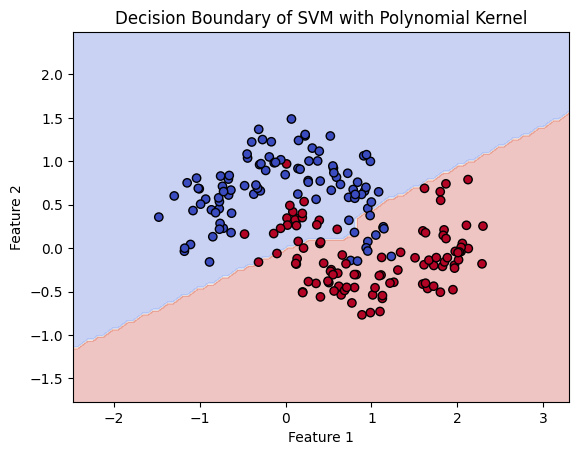

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier with a Polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary of SVM with Polynomial Kernel")
    plt.show()

# Plot decision boundary
plot_decision_boundary(svm_poly, X, y)


# 25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test set
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


# 26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.


In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load the 20 Newsgroups dataset (subset for faster training)
categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, random_state=42)

# Assign features and labels
X_train, y_train = newsgroups_train.data, newsgroups_train.target
X_test, y_test = newsgroups_test.data, newsgroups_test.target

# Create a text classification pipeline with Multinomial Naïve Bayes
model = make_pipeline(CountVectorizer(), TfidfTransformer(), MultinomialNB())

# Train the classifier
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.84


# 27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually


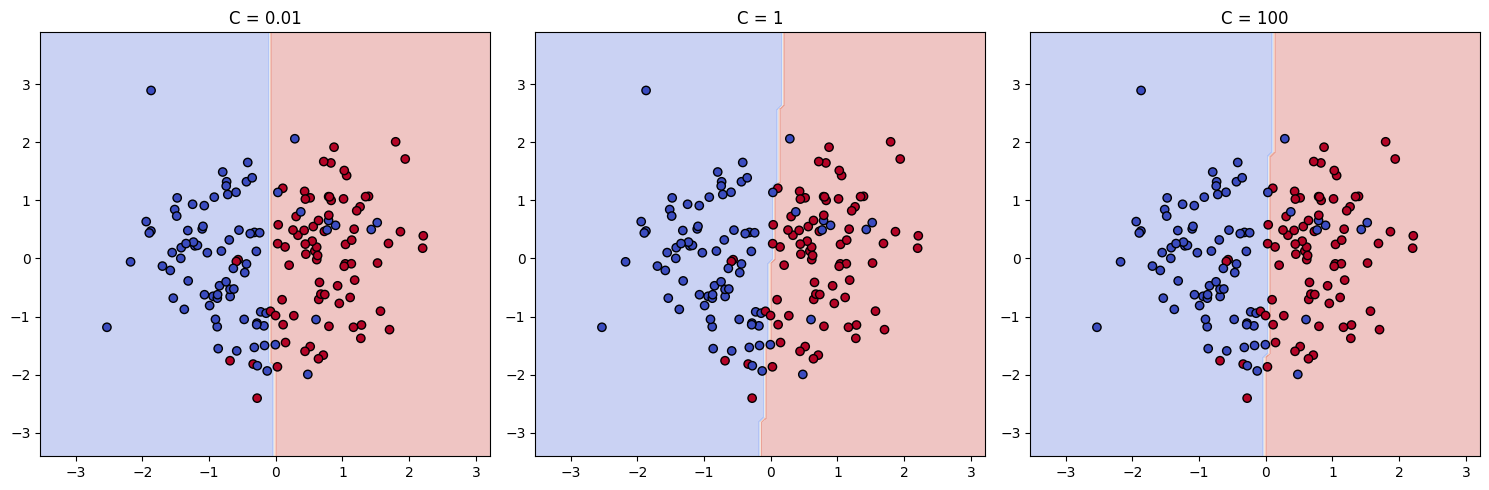

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Different C values to test
C_values = [0.01, 1, 100]

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)

# Train SVM models with different C values and plot decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X_train, y_train, axes[i], f"C = {C}")

plt.tight_layout()
plt.show()


# 28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.


In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Binarize the features (convert to binary 0/1 values)
binarizer = Binarizer(threshold=X.mean())  # Threshold at mean value
X_bin = binarizer.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.2, random_state=42)

# Train Bernoulli Naïve Bayes classifier
model = BernoulliNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.81


# 29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data


Accuracy without Scaling: 0.9561
Accuracy with Scaling: 0.9561


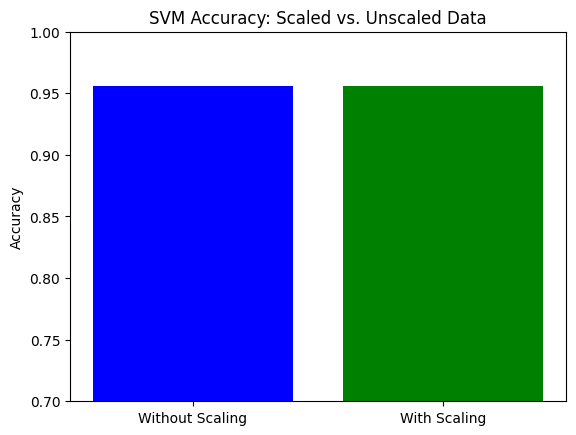

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM without scaling
svm_unscaled = SVC(kernel='linear', random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Apply Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with scaled data
svm_scaled = SVC(kernel='linear', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print Accuracy Comparison
print(f"Accuracy without Scaling: {accuracy_unscaled:.4f}")
print(f"Accuracy with Scaling: {accuracy_scaled:.4f}")

# Bar plot for visualization
labels = ['Without Scaling', 'With Scaling']
accuracies = [accuracy_unscaled, accuracy_scaled]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylim(0.7, 1)  # Set y-axis range
plt.ylabel('Accuracy')
plt.title('SVM Accuracy: Scaled vs. Unscaled Data')
plt.show()


# 30.  Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.


Accuracy without Laplace Smoothing: 1.0000
Accuracy with Laplace Smoothing: 1.0000


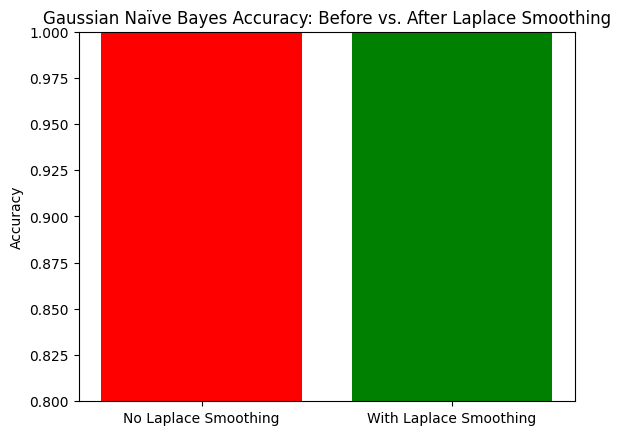

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naïve Bayes model without Laplace Smoothing
gnb_no_smoothing = GaussianNB(var_smoothing=0)  # No Laplace Smoothing
gnb_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)
accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)

# Train Gaussian Naïve Bayes model with default Laplace Smoothing
gnb_with_smoothing = GaussianNB()  # Default var_smoothing=1e-9
gnb_with_smoothing.fit(X_train, y_train)
y_pred_with_smoothing = gnb_with_smoothing.predict(X_test)
accuracy_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)

# Print Accuracy Comparison
print(f"Accuracy without Laplace Smoothing: {accuracy_no_smoothing:.4f}")
print(f"Accuracy with Laplace Smoothing: {accuracy_with_smoothing:.4f}")

# Bar plot for visualization
labels = ['No Laplace Smoothing', 'With Laplace Smoothing']
accuracies = [accuracy_no_smoothing, accuracy_with_smoothing]

plt.bar(labels, accuracies, color=['red', 'green'])
plt.ylim(0.8, 1)  # Set y-axis range
plt.ylabel('Accuracy')
plt.title('Gaussian Naïve Bayes Accuracy: Before vs. After Laplace Smoothing')
plt.show()


# 31.  Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient for RBF
    'kernel': ['linear', 'rbf', 'poly']  # Different kernel types
}

# Perform GridSearchCV to find the best hyperparameters
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Train SVM with the best parameters
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.4f}")




Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Model Accuracy: 1.0000


# 32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.


Class distribution before training: Counter({0: 897, 1: 103})

Without Class Weighting:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       180
           1       0.44      0.20      0.28        20

    accuracy                           0.90       200
   macro avg       0.68      0.59      0.61       200
weighted avg       0.87      0.90      0.88       200


With Class Weighting:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       180
           1       0.47      0.45      0.46        20

    accuracy                           0.90       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.89      0.90      0.89       200


Accuracy without Class Weighting: 0.8950
Accuracy with Class Weighting: 0.8950


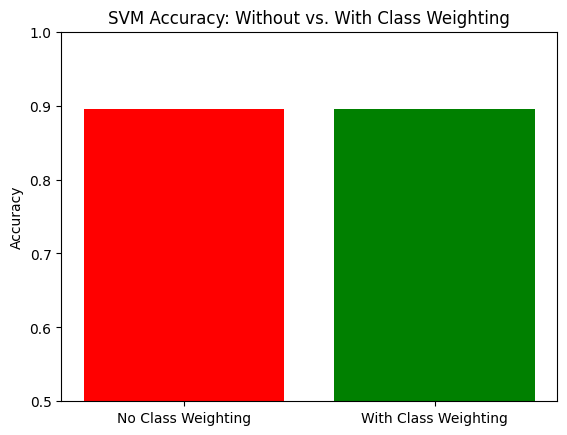

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Print class distribution
print("Class distribution before training:", Counter(y))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM Classifier without class weighting
svm_no_weighting = SVC(kernel='rbf', C=1.0, random_state=42)
svm_no_weighting.fit(X_train, y_train)
y_pred_no_weighting = svm_no_weighting.predict(X_test)
accuracy_no_weighting = accuracy_score(y_test, y_pred_no_weighting)

# Train an SVM Classifier with class weighting
svm_weighted = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

# Print classification reports
print("\nWithout Class Weighting:")
print(classification_report(y_test, y_pred_no_weighting))

print("\nWith Class Weighting:")
print(classification_report(y_test, y_pred_weighted))

# Compare Accuracy
print(f"\nAccuracy without Class Weighting: {accuracy_no_weighting:.4f}")
print(f"Accuracy with Class Weighting: {accuracy_weighted:.4f}")

# Bar plot to visualize improvement
labels = ['No Class Weighting', 'With Class Weighting']
accuracies = [accuracy_no_weighting, accuracy_weighted]

plt.bar(labels, accuracies, color=['red', 'green'])
plt.ylim(0.5, 1)  # Set y-axis range
plt.ylabel('Accuracy')
plt.title('SVM Accuracy: Without vs. With Class Weighting')
plt.show()


# 33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [20]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (Updated working URL from UCI repository)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"

# Read the dataset (tab-separated values)
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Convert labels to binary (ham -> 0, spam -> 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Convert text data into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Multinomial Naïve Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Test with a custom email message
test_email = ["Congratulations! You've won a free lottery. Claim now!"]
test_vectorized = vectorizer.transform(test_email)
prediction = nb_classifier.predict(test_vectorized)
print("\nPrediction for custom email:", "Spam" if prediction[0] == 1 else "Not Spam")



Model Accuracy: 0.9794

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Prediction for custom email: Spam


# 34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.


In [21]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier.fit(X_train_scaled, y_train)
svm_preds = svm_classifier.predict(X_test_scaled)

# Train Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_preds = nb_classifier.predict(X_test)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, svm_preds)
nb_accuracy = accuracy_score(y_test, nb_preds)

# Print results
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Naïve Bayes Accuracy: {nb_accuracy:.2f}")

# Compare performance
if svm_accuracy > nb_accuracy:
    print("SVM performed better.")
elif svm_accuracy < nb_accuracy:
    print("Naïve Bayes performed better.")
else:
    print("Both models performed equally well.")


SVM Accuracy: 1.00
Naïve Bayes Accuracy: 1.00
Both models performed equally well.


# 35.  Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.


In [22]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes without feature selection
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_preds = nb_classifier.predict(X_test)
accuracy_without_fs = accuracy_score(y_test, nb_preds)

# Apply Feature Selection (Select top 10 features using Chi-Square test)
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train Naïve Bayes with selected features
nb_classifier_selected = GaussianNB()
nb_classifier_selected.fit(X_train_selected, y_train)
nb_preds_selected = nb_classifier_selected.predict(X_test_selected)
accuracy_with_fs = accuracy_score(y_test, nb_preds_selected)

# Print results
print(f"Accuracy without Feature Selection: {accuracy_without_fs:.2f}")
print(f"Accuracy with Feature Selection: {accuracy_with_fs:.2f}")

# Compare performance
if accuracy_with_fs > accuracy_without_fs:
    print("Feature selection improved accuracy.")
elif accuracy_with_fs < accuracy_without_fs:
    print("Feature selection reduced accuracy.")
else:
    print("Feature selection had no significant impact.")


Accuracy without Feature Selection: 0.97
Accuracy with Feature Selection: 0.96
Feature selection reduced accuracy.


# 36.  Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy


In [23]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with One-vs-Rest (OvR)
svm_ovr = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
svm_ovr.fit(X_train, y_train)
y_pred_ovr = svm_ovr.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

# Train SVM with One-vs-One (OvO)
svm_ovo = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
svm_ovo.fit(X_train, y_train)
y_pred_ovo = svm_ovo.predict(X_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

# Print comparison results
print(f"Accuracy with One-vs-Rest (OvR): {accuracy_ovr:.2f}")
print(f"Accuracy with One-vs-One (OvO): {accuracy_ovo:.2f}")

# Compare performance
if accuracy_ovr > accuracy_ovo:
    print("OvR performed better.")
elif accuracy_ovr < accuracy_ovo:
    print("OvO performed better.")
else:
    print("Both strategies performed equally.")


Accuracy with One-vs-Rest (OvR): 1.00
Accuracy with One-vs-One (OvO): 1.00
Both strategies performed equally.


# 37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy


In [25]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different kernels
kernels = ['linear', 'poly', 'rbf']
accuracies = {}

# Train and evaluate SVM models with different kernels
for kernel in kernels:
    if kernel == 'poly':
        svm_model = SVC(kernel=kernel, degree=3, random_state=42)  # Specify degree only for 'poly'
    else:
        svm_model = SVC(kernel=kernel, random_state=42)  # No degree for 'linear' or 'rbf'

    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[kernel] = accuracy
    print(f"Accuracy with {kernel} kernel: {accuracy:.4f}")

# Determine the best-performing kernel
best_kernel = max(accuracies, key=accuracies.get)
print(f"\nBest performing kernel: {best_kernel} with accuracy {accuracies[best_kernel]:.4f}")



Accuracy with linear kernel: 0.9561
Accuracy with poly kernel: 0.9474
Accuracy with rbf kernel: 0.9474

Best performing kernel: linear with accuracy 0.9561


# 38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.


In [26]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC

# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Define SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Use Stratified K-Fold Cross-Validation (k=5)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy for each fold
cv_scores = cross_val_score(svm_model, X, y, cv=skf, scoring='accuracy')

# Print accuracy for each fold
print("Accuracy scores for each fold:", cv_scores)

# Compute and print the average accuracy
average_accuracy = np.mean(cv_scores)
print(f"\nAverage Accuracy: {average_accuracy:.4f}")


Accuracy scores for each fold: [0.94736842 0.92982456 0.95614035 0.93859649 0.96460177]

Average Accuracy: 0.9473


# 39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance


In [27]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define different class prior probabilities
priors_list = [
    None,  # Default uniform priors
    [0.7, 0.2, 0.1],  # Custom priors (favoring class 0)
    [0.33, 0.33, 0.34]  # Nearly equal priors
]

# Train and evaluate models with different priors
for priors in priors_list:
    nb_model = GaussianNB(priors=priors)
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Priors: {priors if priors else 'Default'} | Accuracy: {accuracy:.4f}")


Priors: Default | Accuracy: 0.9667
Priors: [0.7, 0.2, 0.1] | Accuracy: 0.9333
Priors: [0.33, 0.33, 0.34] | Accuracy: 0.9667


# 40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.


In [28]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train an SVM model without feature selection
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_without_rfe = accuracy_score(y_test, y_pred)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=SVC(kernel="linear", random_state=42), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train an SVM model with selected features
svm_model_rfe = SVC(kernel="linear", random_state=42)
svm_model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_model_rfe.predict(X_test_rfe)
accuracy_with_rfe = accuracy_score(y_test, y_pred_rfe)

# Print accuracy results
print(f"Accuracy without RFE: {accuracy_without_rfe:.4f}")
print(f"Accuracy with RFE (Top 10 features): {accuracy_with_rfe:.4f}")


Accuracy without RFE: 0.9561
Accuracy with RFE (Top 10 features): 0.9123


# 41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy


In [29]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train an SVM classifier
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.9467
Recall: 0.9861
F1-Score: 0.9660


# 42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).


In [30]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Naïve Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict class probabilities
y_prob = nb_model.predict_proba(X_test)

# Compute Log Loss (Cross-Entropy Loss)
logloss = log_loss(y_test, y_prob)

# Print result
print(f"Log Loss: {logloss:.4f}")


Log Loss: 0.3713


# 43.  Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

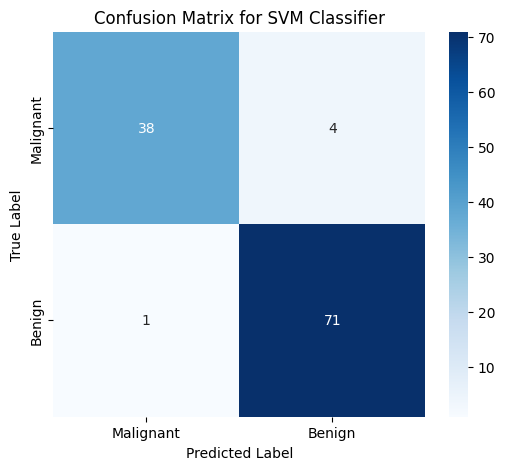

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train an SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Compute the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()


# 44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset
boston = datasets.fetch_california_housing()
X, y = boston.data, boston.target

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (SVR is sensitive to feature scales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM Regressor with RBF kernel
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict on test data
y_pred = svr_model.predict(X_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print MAE
print(f"Mean Absolute Error (MAE): {mae:.4f}")


# 45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naïve Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict probability scores for the positive class
y_probs = nb_model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)

# Print ROC-AUC score
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9984


# 46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

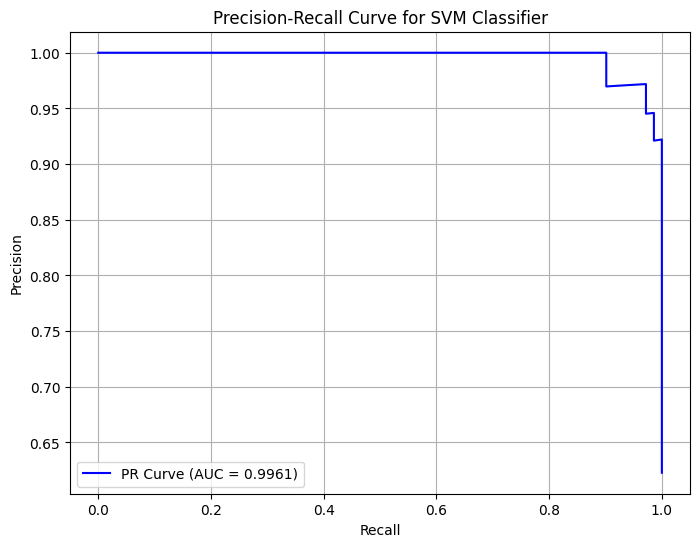

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM Classifier with RBF Kernel
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict probability scores for the positive class
y_probs = svm_model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall values
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Compute AUC (Area Under Curve)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.4f})", color="b")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for SVM Classifier")
plt.legend()
plt.grid()
plt.show()
